# Etude des motifs de préférence musicale Lalala 

In [77]:
import pandas as pd 
import numpy as np 

# import des données 
data = pd.read_csv('../Source/responses.csv')

# on remplit les données manquantes avec NaN 
data = data.replace(r'\s+', np.nan)

# remplacer les variables catégorielles et normaliser les valeurs 
for column in data.columns : 
    data[column] = data[column].astype('category')
    data[column] = data[column].cat.codes

print(data.shape)
print(data.columns)

(1010, 150)
Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)


A ce stade, on a des données propres à utiliser. En effet, on a remplacé les variables catégorielles par des variables numériques. On a également remplacé les champs non renseignés par -1, qui est une valeur jamais prise par les variables.

On calcule la matrice de préférence pour l'ensemble du jeu de données. Pour cela, on sépare d'abord les données pour extraire d'une part les champs à comparer (les goûts musicaux) des caractéristiques (données démographiques).

* Music preferences (19 items)
* Movie preferences (12 items)
* Hobbies & interests (32 items)
* Phobias (10 items)
* Health habits (3 items)
* Personality traits, views on life, & opinions (57 items)
* Spending habits (7 items)
* Demographics (10 items)

In [78]:
# premiere colonne : aime la musique ou non
music_ranking = data.iloc[:,0:1]

# note pour chaque type de musique 
data_music = data.iloc[:,2:19]
print(data_music.shape)
print(data_music.columns)

(1010, 17)
Index(['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance',
       'Opera'],
      dtype='object')


## Matrice de préférence sur l'ensemble des données

On construit la matrice de préférence. Pour cela, on classe sur chaque ligne les styles musicaux du mieux noté au moins bon. Ensuite on calcule les coefficients w(l1,l2) selon si l1 est préféré à l2 ou l'inverse. 
On calcule un coefficient final en moyennant w(l1,l2) sur l'ensemble des observations. Cela donnera la matrice de préférence sur l'ensemble des données. 


In [79]:
# fonction auxiliaire pour le calcul des préférences
def compute_avg(x):
    return (x/len(data_music))*100

# fonction pour créer la matrice de préférence
# matrix : doit être une matrice 2 dimensions, colonnes : critères, lignes : individus
def do_matrix_pref(matrix):
    # on crée la matrice pour stocker les scores de préférences, initialisée à 0 
    omega = pd.DataFrame(0,index=matrix.columns, columns=matrix.columns)

    # pour chaque ligne
    for i in range(len(matrix)): 
        # pour chaque couple de musique
        for column_i in matrix.columns : 
            for column_j in matrix.columns:
                if matrix[column_i][i] < matrix[column_j][i] :
                    omega[column_j][column_i] = omega[column_j][column_i]-1
                if matrix[column_i][i] > matrix[column_j][i] : 
                    omega[column_j][column_i] = omega[column_j][column_i]+1 
                if matrix[column_i][i] == matrix[column_j][i] : 
                    omega[column_j][column_i] = omega[column_j][column_i] 
                    
    omega = omega.apply(compute_avg)
    print(omega.head(4))
    return omega

In [80]:
omega = do_matrix_pref(data_music)

                     Dance       Folk    Country  Classical music    Musical  \
Dance             0.000000  42.871287  47.524752        10.099010  16.633663   
Folk            -42.871287   0.000000   8.910891       -36.732673 -25.247525   
Country         -47.524752  -8.910891   0.000000       -41.188119 -31.980198   
Classical music -10.099010  36.732673  41.188119         0.000000   9.306931   

                       Pop       Rock  Metal or Hardrock       Punk  \
Dance           -22.970297 -25.742574          32.079208  27.722772   
Folk            -52.475248 -63.168317           1.188119  -5.544554   
Country         -59.603960 -68.514851          -3.564356 -10.495050   
Classical music -24.554455 -40.792079          28.613861  23.465347   

                 Hiphop, Rap  Reggae, Ska  Swing, Jazz  Rock n roll  \
Dance              13.564356    16.039604    14.158416    -1.188119   
Folk              -25.643564   -25.841584   -25.742574   -41.089109   
Country           -32.772277  

On a obtenu la matrice de préférence, sur l'ensemble du jeu de données. 
On sait donc quels genres sont généralement préférés à d'autres. Pour faciliter la visualisation des préférences, on utilise un graphique. L'intensité des couleurs définit la grandeur de la valeur.

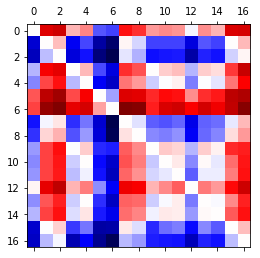

In [82]:
import matplotlib.pyplot as plt

plt.matshow(omega, cmap='seismic')

### interprétation générale 

On observe une diagonale blanche, puisqu'un style musical comparé à lui-même donne bien une préférence de zéro. Une case bleue signifie que le style en abscisse est moins apprécié que celui en ordonnée, et inversement pour une case rouge. 

On notera également une symétrie dans la matrice. Il suffit de prendre la matrice triangulaire inférieure ou supérieure à la diagonale blanche. En effet, soit m1 et m2 deux styles musicaux. On a dans la matrice omega deux cases comparant m1 et m2 : omega[m1][m2] et omega[m2][m1]. On a donc omega[m1][m2] = -omega[m2][m1], donc ces deux cases auront des couleurs opposées de même intensité. 

In [83]:
print(omega.columns[6], " compared to ", omega.columns[2], " is ", omega[omega.columns[6]][omega.columns[2]])

print(omega.columns[16], " compared to ", omega.columns[6], " is ", omega[omega.columns[16]][omega.columns[6]])

Rock  compared to  Country  is  -68.51485148514853
Opera  compared to  Rock  is  67.02970297029704


La case omega[6][2] (resp. omega[2][6]) compare le Rock et la Country. On remarque que les individus préfèrent largement le Rock par exemple. Ils préfèrent aussi largement le Rock à l'Opéra. 

## Matrice de préférences sur différents groupes d'individus

On répète le même processus en ne prenant cette fois qu'une partie des individus du jeu de données. On pourra ensuite calculer la distance entre les matrices obtenues d'une part, la distance des matrices par rapport à celle de l'ensemble de la population. On pourra ainsi mettre en évidence des préférences exceptionnelles, c'est-à-dire en marge par rapport aux préférences majoritaires sur l'ensemble des individus de notre jeu de données. 

In [84]:
# on récupère seulement les données musicales des femmes 
# female -> 0
data_f = data.loc[data['Gender']== 0]
print("Données pour les femmes : ", data_f.shape)
data_f_music = data.iloc[:,2:19]
print("Données musicales des femmes : ", data_f_music.shape)
                     
# on récupère les données musicales des hommes
# male -> 1
data_m = data.loc[data['Gender']== 1]
print("Données pour les hommes : ", data_m.shape)
data_m_music = data.iloc[:,2:19]
print("Données musicales des hommes : ", data_m_music.shape)

Données pour les femmes :  (593, 150)
Données musicales des femmes :  (1010, 17)
Données pour les hommes :  (411, 150)
Données musicales des hommes :  (1010, 17)


On fait les deux matrices de préférences pour ces sous-groupes.

In [85]:
omega_f = do_matrix_pref(data_f_music)

omega_m = do_matrix_pref(data_m_music)

                     Dance       Folk    Country  Classical music    Musical  \
Dance             0.000000  42.871287  47.524752        10.099010  16.633663   
Folk            -42.871287   0.000000   8.910891       -36.732673 -25.247525   
Country         -47.524752  -8.910891   0.000000       -41.188119 -31.980198   
Classical music -10.099010  36.732673  41.188119         0.000000   9.306931   

                       Pop       Rock  Metal or Hardrock       Punk  \
Dance           -22.970297 -25.742574          32.079208  27.722772   
Folk            -52.475248 -63.168317           1.188119  -5.544554   
Country         -59.603960 -68.514851          -3.564356 -10.495050   
Classical music -24.554455 -40.792079          28.613861  23.465347   

                 Hiphop, Rap  Reggae, Ska  Swing, Jazz  Rock n roll  \
Dance              13.564356    16.039604    14.158416    -1.188119   
Folk              -25.643564   -25.841584   -25.742574   -41.089109   
Country           -32.772277  

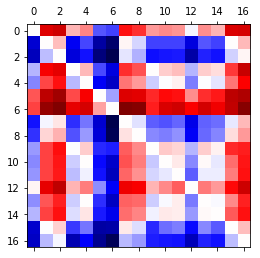

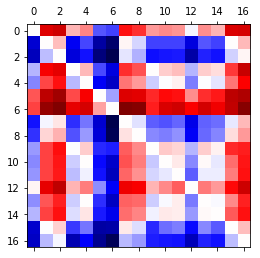

In [87]:
plt.matshow(omega_f, cmap='seismic')
plt.matshow(omega_m, cmap='seismic')

# TODO changer de méthode pyplot parce que c'est 3 fois la même chose, c'est pas pertinent...